### Recurrent Neural Networks (RNNs) are a type of neural network architecture that is particularly well-suited for tasks involving sequential data. Unlike feedforward neural networks, which process data in fixed-size chunks, RNNs can handle input sequences of arbitrary length.
#### key features of RNNs:

- Recurrent Connections: RNNs have recurrent connections that allow information to persist across different time steps in a sequence. This means that information from previous inputs is considered when processing the current input.

- Shared Parameters: The same set of weights and biases are applied at each time step. This allows the network to use the same computation for different elements of the sequence.

- Time Dependency: RNNs are well-suited for tasks where the order or temporal dependency of data matters, such as time series prediction, language modeling, and speech recognition.



### Applications of RNNs:

- Language Modeling and Text Generation: RNNs can be used to model the probability distribution of sequences of words. This enables tasks like auto-completion, machine translation, and text generation.

- Time Series Prediction: RNNs are effective for tasks like stock price prediction, weather forecasting, and any scenario where the current state depends on previous states.

- Speech Recognition: RNNs can be used to convert spoken language into written text. This is crucial for applications like voice assistants (e.g., Siri, Alexa).

- Handwriting Recognition: RNNs can recognize handwritten text, enabling applications like digit recognition and signature verification.

- Image Captioning: RNNs can be combined with Convolutional Neural Networks (CNNs) to generate captions for images.

- Video Analysis: RNNs can process sequences of images or video frames, making them useful for tasks like action recognition, video captioning, and video prediction.

- Anomaly Detection: RNNs can be used to detect anomalies in sequences of data, making them valuable for tasks like fraud detection in finance or detecting defects in manufacturing.

- Sentiment Analysis: RNNs can analyze sequences of text to determine the sentiment expressed.


### Mathematical Implementation:

Terms:
- xt: Input at time step at t
- ht: Hidden state at time step at t
- Whx: Weight matrix for input-to-hidden connections
- Whh: Weight matrix for hidden-to-hidden connections
- bh:Bias term for hidden layer
- Wyh: Weight matrix for hidden-to-output connection
- by: Bias term for output layer

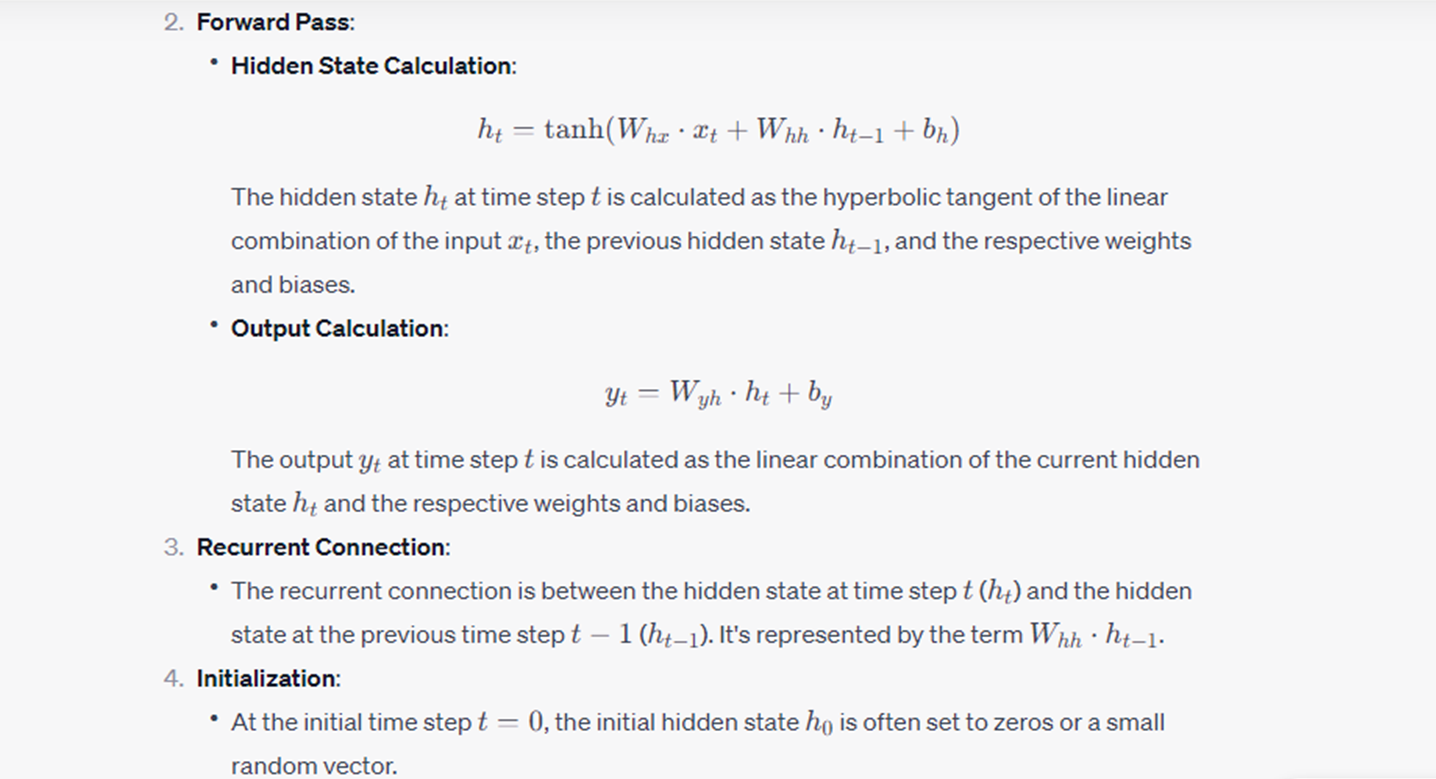



### Training:

During training, you would use backpropagation through time (BPTT) to compute gradients and update the weights and biases to minimize the loss function.
Prediction:

Once the network is trained, you can make predictions by passing a sequence of inputs through the network.
This is a basic mathematical interpretation of a simple RNN. In practice, more sophisticated variants like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are often used to address issues like vanishing gradients and better capture long-term dependencies.

### Below is a basic implementation of a simple RNN using only the NumPy library. This code demonstrates how you can manually perform forward passes through time.

A,sum(A*Wi),sum(A*Wi*Hi), A*Wi*Hi*Aout - 0 , 1

In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hyperbolic tangent (tanh) activation function
def tanh(x):
    return np.tanh(x)

# Define the derivative of the tanh activation function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Define the RNN class
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W_hx = np.random.randn(hidden_size, input_size)
        self.W_hh = np.random.randn(hidden_size, hidden_size)
        self.W_yh = np.random.randn(output_size, hidden_size)
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))
        
    def forward(self, x):
        # Initialize hidden state
        h = np.zeros((self.W_hx.shape[0], 1))
        
        # Lists to store intermediate values
        self.h_states = []
        self.x_inputs = []
        
        for t in range(len(x)):
            # Update hidden state
            h = tanh(np.dot(self.W_hx, x[t]) + np.dot(self.W_hh, h) + self.b_h)
            self.h_states.append(h)
            self.x_inputs.append(x[t])
            
        # Calculate output
        y = np.dot(self.W_yh, h) + self.b_y
        
        return y, h
    
    def backward(self, x, y_true, learning_rate):
        # Initialize gradients
        dW_hx, dW_hh, dW_yh = np.zeros_like(self.W_hx), np.zeros_like(self.W_hh), np.zeros_like(self.W_yh)
        db_h, db_y = np.zeros_like(self.b_h), np.zeros_like(self.b_y)
        dh_next = np.zeros_like(self.h_states[0])
        
        for t in reversed(range(len(x))):
            # Compute gradients
            dy = y_true - x[t]
            dW_yh += np.dot(dy, self.h_states[t].T)
            db_y += dy
            dh = np.dot(self.W_yh.T, dy) + dh_next
            dh_raw = tanh_derivative(self.h_states[t]) * dh
            db_h += dh_raw
            dW_hx += np.dot(dh_raw, self.x_inputs[t].T)
            dW_hh += np.dot(dh_raw, self.h_states[t-1].T)
            dh_next = np.dot(self.W_hh.T, dh_raw)
        
        # Clip gradients to avoid exploding gradients (optional)
        for gradient in [dW_hx, dW_hh, dW_yh, db_h, db_y]:
            np.clip(gradient, -5, 5, out=gradient)
        
        # Update weights and biases
        self.W_hx -= learning_rate * dW_hx
        self.W_hh -= learning_rate * dW_hh
        self.W_yh -= learning_rate * dW_yh
        self.b_h -= learning_rate * db_h
        self.b_y -= learning_rate * db_y


### Explanation:

- The code defines a basic RNN class (SimpleRNN) with methods for forward pass (forward) and backward pass (backward).

- The activation functions (sigmoid and tanh) and their derivatives are defined.

- The forward method performs a forward pass through the RNN, storing intermediate values for backpropagation.

- The backward method computes gradients and updates the weights and biases using backpropagation through time (BPTT).

### Let us use Keras library to create and train a basic RNN for a toy example of sequence prediction. This example uses a very simple sequence (1, 2, 3, 4, 5) and tries to predict the next number in the sequence.



X
Y=(5,6,7,8)

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some sample data
X = np.array([[i+j for j in range(5)] for i in range(100)])
y = np.array([i+5 for i in range(100)])
y

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104])

In [14]:
# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [15]:
# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
#Train the model
model.fit(X, y, epochs=10, batch_size=8)

# Test the model
test_input = np.array([[i+j for j in range(5)] for i in range(120, 130)])
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 1))
predicted_output = model.predict(test_input)

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0893
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0603
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0413
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0287
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0175
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0187
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0295
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.9962
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 0.9838
Epoch 10/10
1/1 [==============================] - 0s 36ms/step


In [21]:
# Print the predicted output
print("Predicted Output:")
print(predicted_output.flatten())

Predicted Output:
[126.627495 127.65717  128.68687  129.71657  130.74625  131.77597
 132.80565  133.83534  134.86504  135.89471 ]


### Let's create a simple RNN using Keras with some sample data. In this example, we'll use a sequence of numbers to predict the next number in the sequence.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some sample data
np.random.seed(0)
sequence_length = 10
X = np.random.rand(100, sequence_length)
y = np.sum(X, axis=1)

# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=8)

# Test the model
test_input = np.random.rand(10).reshape((1, sequence_length, 1))
predicted_output = model.predict(test_input)

# Print the predicted output
print("Predicted Output:", predicted_output[0, 0])
